# **TP1**: Algoritmos de ML (DataSet: Marketing)

## Procesamiento

### Exploracion y limpieza de datos
---


##### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import sklearn as sk
pd.set_option('display.max_columns', 200)

##### Exploración

###### Entendimiento

In [40]:
df = pd.read_csv('./data/Marketing.csv', sep=';')

In [41]:
df.shape

(41188, 21)

In [42]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [44]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


###### Transformacion de datos

In [66]:
# Encode y to 0/1
df['y_num'] = df['y'].map({'no':0, 'yes':1})

In [68]:
# Encode Age a rangos de edades

# 1. Definir rangos y etiquetas de generaciones
bins = [0, 24, 40, 56, 75, 120]
labels = [
    'Gen Z (≤24)', 
    'Millennials (25-40)', 
    'Gen X (41-56)',
    'Baby Boomers (57-75)', 
    'Silent Gen (>75)'
]

# 2. Crear columna 'generation'
df['generation'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

###### Evaluando skews

In [45]:
# Evaluar si los valores de contact podrian no ser significativos
print(df["contact"].value_counts(normalize=True))

# Evaluar si los valores de default podrian no ser significativos
print(df["default"].value_counts(normalize=True))

# Evaluar si los valores de housing podrian no ser significativos
print(df["housing"].value_counts(normalize=True))

# Evaluar si los valores de education podrian no ser significativos
print(df['education'].value_counts(normalize=True))

# Evaluar si los valores de marital podrian no ser significativos
print(df["marital"].value_counts(normalize=True))

# Evaluar si los valores de poutcome podrian no ser significativos
print(df["poutcome"].value_counts(normalize=True))

# Evaluar si los valores de month podrian no ser significativos
print(df["month"].value_counts(normalize=True))

# Evaluar si los valores de day_of_week podrian no ser significativos
print(df["day_of_week"].value_counts(normalize=True))

# Evaluar si los valores de loan podrian no ser significativos
print(df["loan"].value_counts(normalize=True))

# Evaluar si los valores de campaign podrian no ser significativos
print(df["campaign"].value_counts().sort_index())

# Evaluar si los valores de duration podrian no ser significativos
proporcion_ceros = (df["duration"] == 0).mean()
print(f"¿Más del 50% de las llamadas tienen duración 0?: {proporcion_ceros > 0.5}")

# Evaluar si los valores de pdays podrian no ser significativos
porcentaje_999 = (df["pdays"] == 999).mean()
print(f"Porcentaje con pdays = 999: {porcentaje_999:.2%}")

contact
cellular     0.634748
telephone    0.365252
Name: proportion, dtype: float64
default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64
housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64
education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64
marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64
poutcome
nonexistent    0.863431
failure        0.103234
success        0.033335
Name: proportion, dtype: float64
month
may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: pro

In [46]:
# Evaluar si los valores de nr.employed podrian no ser significativos
print(df["nr.employed"].describe())

# Evaluar si los valores de euribor3m podrian no ser significativos
print(df["euribor3m"].describe())

# Evaluar si los valores de cons.conf.idx podrian no ser significativos
print(df["cons.conf.idx"].describe())

# Evaluar si los valores de cons.price.idx podrian no ser significativos
print(df["cons.price.idx"].describe())

# Evaluar si los valores de emp.var.rate podrian no ser significativos
print(df["emp.var.rate"].describe())

# Evaluar si los valores de previous podrian no ser significativos
print(df["previous"].describe())

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64
count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64
count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64
count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64
count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max

###### Graficos para entender mejor los datos y sus relaciones

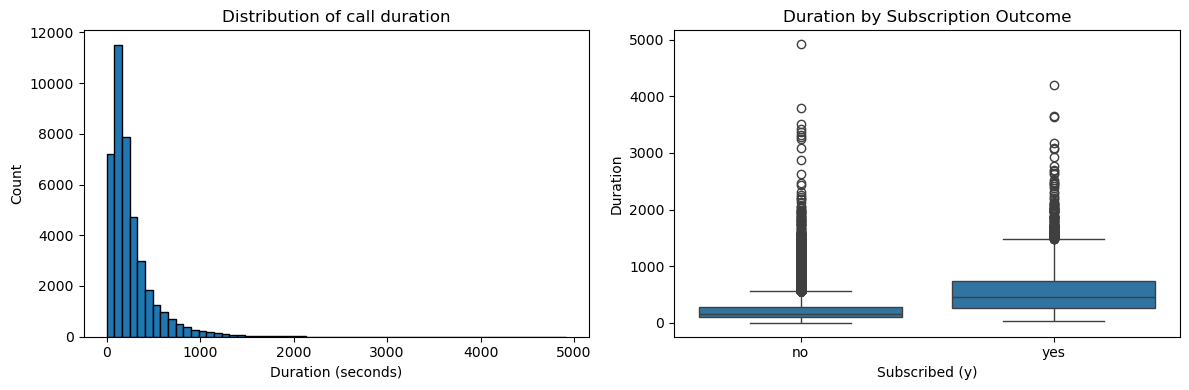

In [65]:
# Evaluando la distribucion de llamadas
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

# Left plot
axes[0].hist(df['duration'].dropna(), bins=60, edgecolor='k')
axes[0].set_title("Distribution of call duration")
axes[0].set_xlabel("Duration (seconds)")
axes[0].set_ylabel("Count")

# Right plot
sns.boxplot(x='y', y='duration', data=df, ax=axes[1])
axes[1].set_title("Duration by Subscription Outcome")
axes[1].set_xlabel("Subscribed (y)")
axes[1].set_ylabel("Duration")

plt.tight_layout()
plt.show()

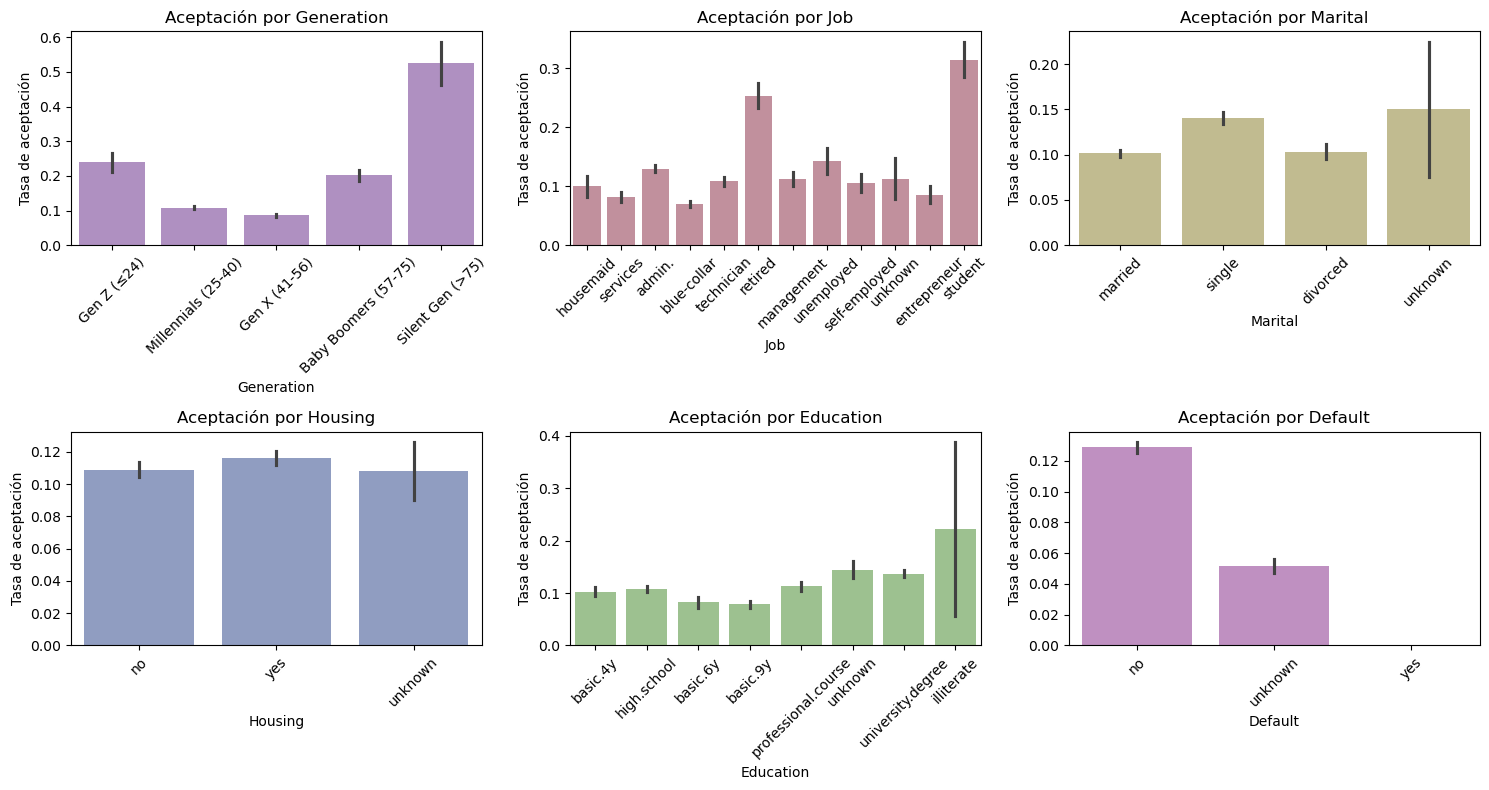

In [79]:
# Evaluando distribucion de aceptacion por edad, trabajo, marital, housing y educacion
cat_cols = ['generation', 'job', 'marital', 'housing', 'education', 'default']

# Definiendo colores
colors = {
    'generation':"#b188c9",
    'job':'#c98899',
    'marital':'#c9c188',
    'housing':'#8899c9',
    'education':'#99c988',
    'default': "#c688c9",
}


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]

    sns.barplot(
        x=col,
        y='y_num',
        data=df,
        ax=ax,
        color=colors[col]
        # ← mapa de colores distinto por cada gráfico
    )

    ax.set_title(f"Aceptación por {col.capitalize()}")
    ax.set_ylabel("Tasa de aceptación")
    ax.set_xlabel(col.capitalize())
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

###### Ingeniería de datos

**Variables significativas** 

- age: La desviación estándar de la edad es mayor a 5, por lo tanto, no tiene poca variabilidad. Esto significa que la edad abarca un rango amplio y tiene suficiente dispersión para aportar información útil y se considera significativa.             
- cons.conf.idx: La desviación estándar es moderada a comparación con la media. La variable tiene una variabilidad razonable, no parece estar saturada ni constante. Puede ser significativa, relevante.      
- euribor3m: La desviación estándar es bastante grande comparada con la media. Esto indica una buena variabilidad relativa y por lo tanto, es una variable significativa, puede aportar información útil.           
- job: Sus valores están bastante distribuidos entre varias categorías. Además, el porcentaje de valores "unknown" es bajo, por lo que no hay demasiados datos faltantes. Esto indica que por su buena variabilidad, es significativa.        
- emp.var.rate: La desviación estándar es alta con respecto a la media, lo que indica bastante variabilidad en los datos. Aunque los valores negativos indican disminución en empleo, la variabilidad es alta, lo que puede ser importante para modelar. Es significativa, por su buena variabilidad.             
- marital: Aunque la variable está un poco desbalanceada hacia "married", hay representación significativa en las otras categorías. Ademas, el bajo porcentaje de "unknown" indica buena calidad de la variable. Es significativa.             
- duration: La mayoría de las llamadas tienen duración mayor a 0 y está altamente relacionada con y porque si la llamada fue muy corta, probablemente el cliente no aceptó y si fue larga, probablemente sí. Por lo tanto, es significativa.             
- campaign: La distribución de la cantidad de contactos muestra un rango amplio, desde 1 contacto hasta 56. La mayoría de los clientes fue contactada pocas veces, con frecuencia decreciente a medida que aumenta el número de contactos. Esto muestra una variable con bastante información sobre el nivel de interacción con cada cliente. Se considera una variable significativa, con buena variabilidad que puede aportar valor.   
- contact: Menos del 50% de los valores de contact son "unknown", entonces no está dominada por valores desconocidos, puede ser significativa.             
- education: Menos del 50% de los valores son "unknown". Esto indica que la mayoría de los datos tienen información valida y pueden aportar información relevante sobre el perfil educativo. Puede ser significativa.           
- housing: Los "unknown" son bajos, lo cual es positivo. El porcentaje de "yes" es de 52% y el de "no" es de 45%, es decir que, están bien repartidos y se considera significativa.    

**Variables poco significativas** 

- loan: El 82% tiene como respuesta "no" y tan solo un 15% tiene como respuesta "si". La variable está bastante desbalanceada, pero no dominada por "unknown", lo que es positivo. Puede ser significativa pero no es muy determinante.              
- month: Los contactos están concentrados en ciertos meses y los otros tienen muy pocos registros. Podría ser significativo solo si el mes tiene relación con la efectividad de la campaña.                                 
- cons.price.idx: La variable no varia mucho en los datos, su variabilidad es menor al 1%. A pesar de eso, puede ser útil si pequeñas diferencias impactan la variable objetivo. Sin embargo, la poca variación la hace menos determinante. Es una variable poco significativa. 
- nr.employed: Aunque el rango es amplio, la desviación estándar es baja (72 sobre un valor medio de 5200. Puede ser útil, aunque por su baja variación, no será determinante sola.   

**Variables no significativas** 

- default: Tiene un 79% en "no", un 21% en "unknown" y casi nada en "yes". Esto significa que es una variable desbalanceada, con muchos "no" y una cantidad significativa de "unknown". Podría descartarse, no da información relevante.    
- previous: La media es muy baja y la mayoría de los datos están en 0, no tienen contacto previo. Es una variable numérica con mucha concentración en cero, pero con algunos valores atípicos o casos con más contactos. No se considera significativa, es poco informativa. 
- poutcome: Sus valores están muy desbalanceados, con mayoría de casos sin campaña previa. Sin embargo, las categorías “failure” y “success” pueden tener información útil para el modelo. Puede ser informativa pero no se considera significativa.      
- day_of_week: La distribución es bastante uniforme entre los días lunes a viernes. Todos rondan entre el 19% y el 21%. Por lo tanto, no aporta variabilidad relevante.  
- pdays: El 96.32% de los registros tienen pdays = 999, es decir, la gran mayoría no tuvo contacto previo. Esto indica que esta variable está muy dominada por un valor constante, con poca variabilidad útil para el modelo. La variable se considera no significativa, por la alta proporción del valor 999.   

## Respuestas

### **1. Identificación del Tipo de Problema**
---
Es un **problema de clasificación binaria**, ya que la variable objetivo (`y`) es categórica con dos clases: "yes" o "no". El objetivo es predecir si un cliente suscribirá un producto financiero (ejemplo típico de marketing bancario).

### **2. Variables y sus Características**  
---
El dataset contiene **21 variables**:

| Variable           | Tipo               | Descripción/Rango                                     | Ejemplo               |
|---------------------|--------------------|-------------------------------------------------------|-----------------------|
| **age**            | Numérica continua  | Edad del cliente (ej. 56, 57)                         | 56                   |
| **job**            | Categórica nominal | Ocupación (12 categorías: "admin.", "blue-collar", etc.) | "housemaid"          |
| **marital**        | Categórica nominal | Estado civil ("married", "single", "divorced")        | "married"            |
| **education**      | Categórica ordinal | Nivel educativo ("basic.4y", "high.school", etc.)     | "basic.4y"           |
| **default**        | Categórica binaria | ¿Tiene crédito en mora? ("no", "yes", "unknown")       | "no"                 |
| **housing**        | Categórica binaria | ¿Tiene préstamo hipotecario? ("no", "yes")             | "no"                 |
| **loan**           | Categórica binaria | ¿Tiene préstamo personal? ("no", "yes")                | "no"                 |
| **contact**        | Categórica nominal | Medio de contacto ("telephone", "cellular")            | "telephone"          |
| **month**          | Categórica cíclica | Mes del último contacto ("may", "jun", etc.)           | "may"                |
| **day_of_week**    | Categórica cíclica | Día de la semana ("mon", "tue", etc.)                  | "mon"                |
| **duration**       | Numérica continua  | Duración del último contacto (segundos)                | 261                  |
| **campaign**       | Numérica discreta  | Número de contactos en esta campaña                   | 1                    |
| **pdays**          | Numérica discreta  | Días desde último contacto (999 = no contactado)       | 999                  |
| **previous**       | Numérica discreta  | Número de contactos antes de esta campaña             | 0                    |
| **poutcome**       | Categórica nominal | Resultado campaña anterior ("nonexistent", "success") | "nonexistent"        |
| **emp.var.rate**   | Numérica continua  | Tasa de variación empleo (económica)                  | 1.1                  |
| **cons.price.idx** | Numérica continua  | Índice de precios al consumidor                       | 93.994               |
| **cons.conf.idx**  | Numérica continua  | Índice de confianza del consumidor                    | -36.4                |
| **euribor3m**      | Numérica continua  | Tasa Euribor a 3 meses                                | 4.857                |
| **nr.employed**    | Numérica continua  | Número de empleados (económica)                       | 5191                 |
| **y**             | Categórica binaria | ¿Suscribió el producto? ("no", "yes")                 | "no"                 |

**Observaciones clave**:  
- Variables como `pdays=999` y `poutcome="nonexistent"` indican que no hubo contacto previo.  
- `duration` puede causar **fugas de datos** (se conoce después del contacto), pero se incluirá con advertencias.  
- Variables económicas (`emp.var.rate`, `euribor3m`) pueden estar correlacionadas.